In [2]:
from pyMouSh import MoulinShape, TimeStamps, Qin_constant, Qin_sinusoidal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import ConnectionPatch
from numpy.random import default_rng

from collections import defaultdict
#import pandas as pd
import pickle
import seaborn as sns

sns.set_theme(style="ticks", font_scale=1.25)

secinday = 24*3600

# Calculate arrays for ploting

In [3]:

#temperature profile based of foxx data -- Lauren
tmp = pd.read_csv('Field_Data/temperature_foxx1.csv')
temperature_profile = tmp.temperature.to_numpy()#np.array([ZERO_KELVIN, ZERO_KELVIN])

initial_subglacial_area = 1 
regional_surface_slope = 0.01
channel_length = 25e3
ice_thickness = 500
initial_head = ice_thickness


time_start = 0
time_end = time_start + 6*secinday # 10 days seems enough to equilibrate more the amplitude reduce 
timestep = 30*60 #seconds #timestep is longer to reduce the volume of data
time = TimeStamps(time_start,time_end,timestep)

# how many days to account for the calculation of the min and max of head
idx_nday = -1*48 #days*number of half an hour in a day
idx_nday_test = -2*48


expected_head_amplitude = 50 # or 55 based of visual measurements of the head amplitude in JEME data
original_head_amplitude = 532.44 

#Import head measurement for JEME
jeme_moulin = pd.read_csv('Field_Data/head_jeme.csv')
jeme_moulin = jeme_moulin.dropna()
h_real = jeme_moulin.head_bed.to_numpy()
t_real = jeme_moulin.soy.to_numpy()



### Sensitivity to meltwater input variability

no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium


<ipython-input-4-5f5c3590433f>:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium
no equilibrium


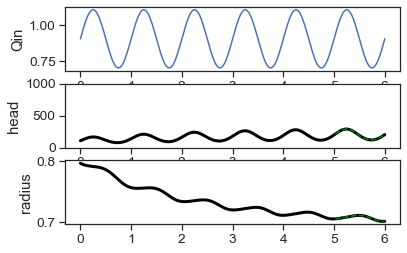

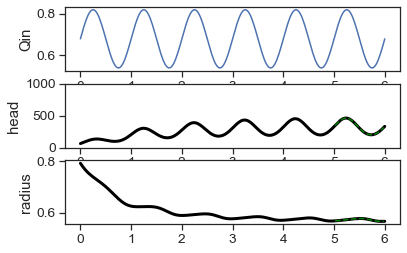

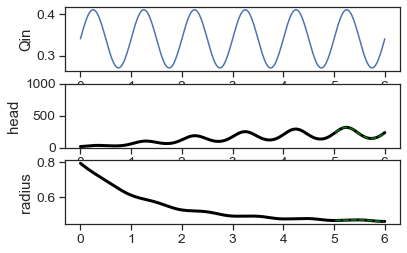

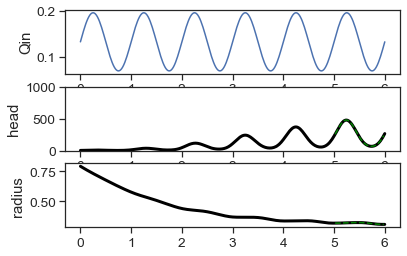

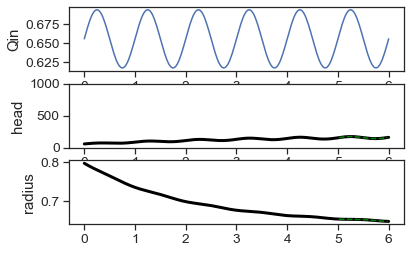

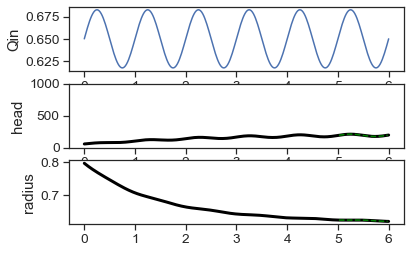

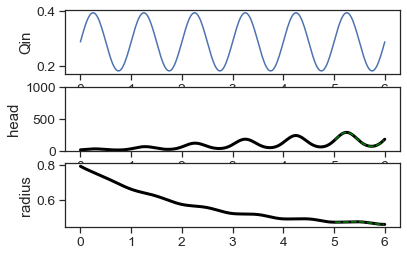

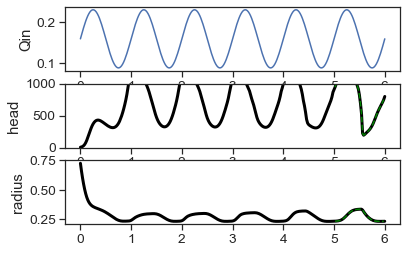

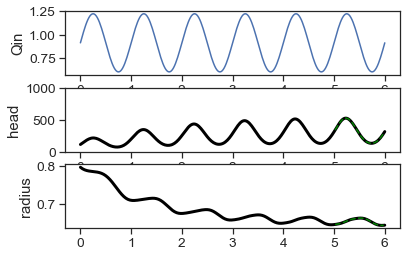

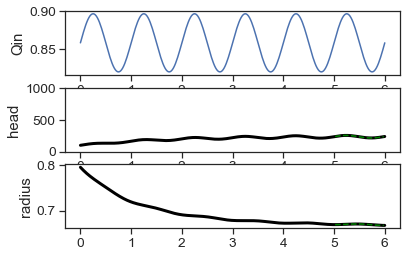

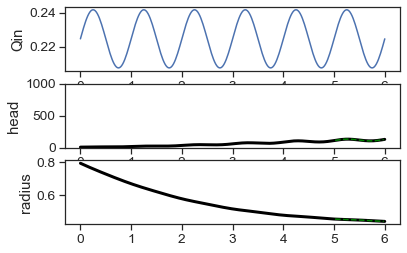

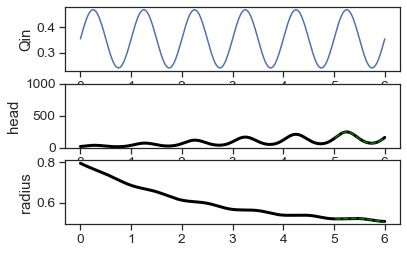

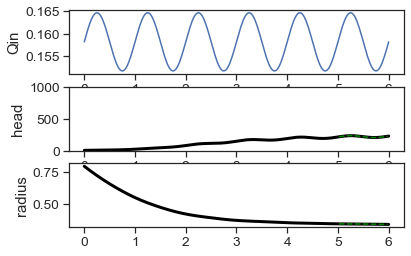

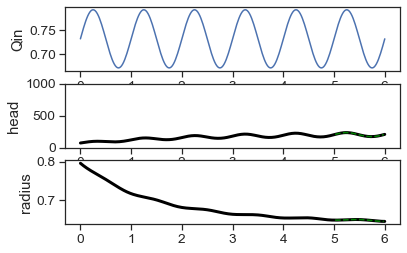

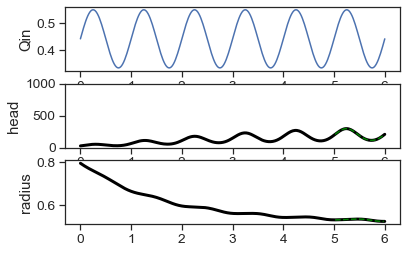

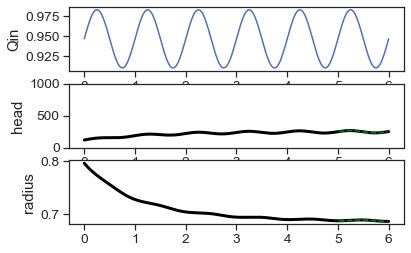

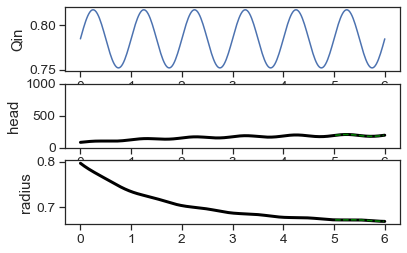

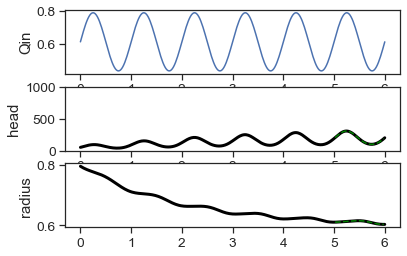

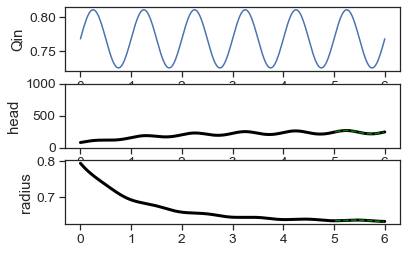

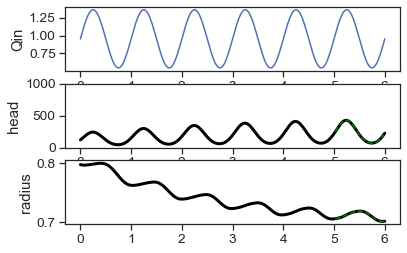

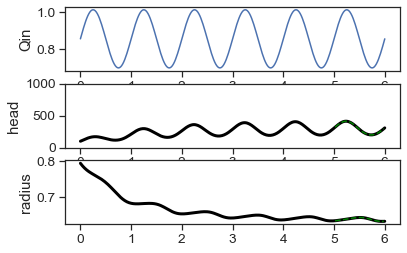

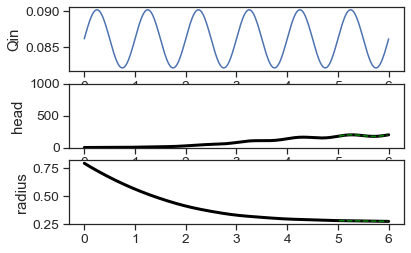

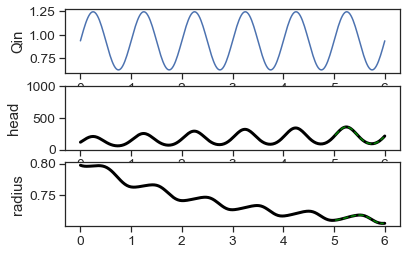

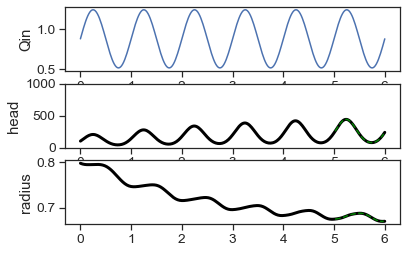

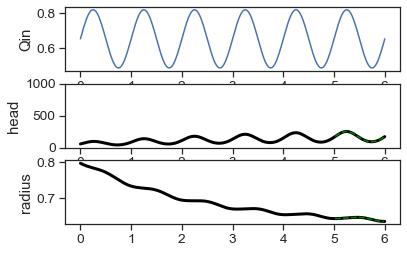

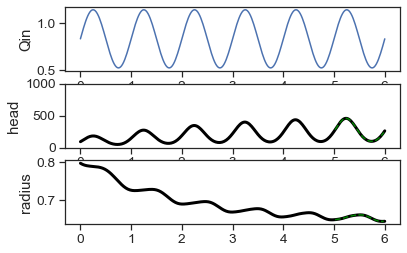

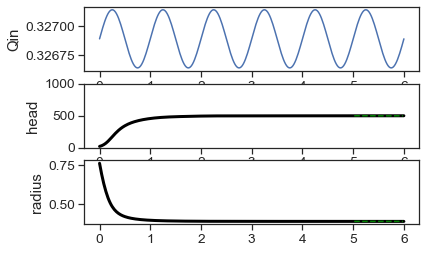

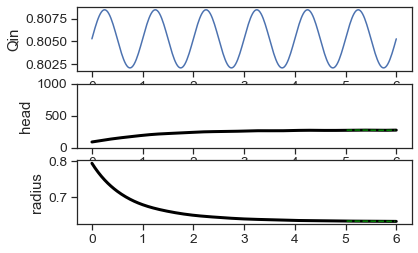

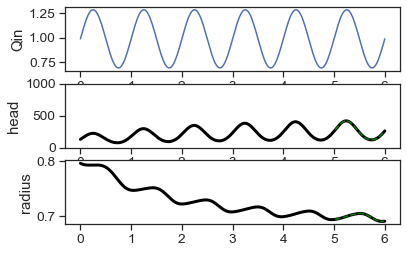

In [4]:
n_run_sim1 = 500 # <------
# create random numbers 
rng1 = default_rng()
rng2 = default_rng() 
rng3 = default_rng()
Qin_mean_run = 1 * rng1.random(n_run_sim1) # <------
Qin_amplitude_run = rng2.random(n_run_sim1) # <------
ice_thickness_run = 300+700 * rng3.random(n_run_sim1)


#initialize variables for loop:
head_amp_sim1 = []
head_amp_sim1_test = []
meltwater_input_sim1 = []
Qin_amp_sim1 = []
Qin_mean_sim1 = []
ice_thickness_sim1 = []

for idx_run in np.arange(n_run_sim1):   
    meltwater_input_sim1 = Qin_sinusoidal(time, Qin_mean_run[idx_run], Qin_amplitude_run[idx_run])         
    moulin = MoulinShape(ice_thickness = ice_thickness_run[idx_run],
                        initial_head = initial_head,
                        initial_subglacial_area = initial_subglacial_area, 
                        channel_length = channel_length,
                        regional_surface_slope = regional_surface_slope,
                        temperature_profile = temperature_profile)
    
    #only take values of amplitude smaller or equal to the mean
    if Qin_mean_run[idx_run]>=2*Qin_amplitude_run[idx_run]:    
               
        for idx,t in enumerate(time) :
            moulin.run1step(time,
                            timestep,
                            meltwater_input_sim1[idx],
                            overflow = True,
                            subglacial_baseflow = 0) 
            
        ##save array for timeseries plot
        #meltwater_input.append(melt_in)   
        #head.append(moulin.dict['head'])

        
        #extract last days for calculating the mean and max
        head_portion = moulin.dict['head'][idx_nday:-1]
        head_portion_test = moulin.dict['head'][idx_nday_test:idx_nday]
        #calculate head amplitude
        head_amp = np.max(head_portion) - np.min(head_portion) #m
        head_amp_test = np.max(head_portion_test) - np.min(head_portion_test)
        if (abs(head_amp - head_amp_test) / head_amp_test)*100 < 2:
            head_amp_sim1.append(head_amp) #m
            head_amp_sim1_test.append(head_amp_test) #m
            #save variable for plot (so that all have the same index)
            Qin_amp_sim1.append(Qin_amplitude_run[idx_run])
            Qin_mean_sim1.append(Qin_mean_run[idx_run])
            ice_thickness_sim1.append(ice_thickness_run[idx_run])
        else:
            print('no equilibrium')
            
            plt.figure()
            plt.subplot(3,1,1)
            plt.plot(time/secinday,meltwater_input_sim1)
            plt.ylabel('Qin')
            plt.subplot(3,1,2)
            plt.plot(time/secinday,moulin.dict['head'],linewidth=3, color='black')
            plt.plot(time[idx_nday:-1]/secinday,moulin.dict['head'][idx_nday:-1], linestyle='--', color='green')
            plt.ylabel('head')
            plt.ylim([0,1000])
            plt.subplot(3,1,3)
            plt.plot(time/secinday,moulin.dict['subglacial_radius'],linewidth=3, color='black')
            plt.plot(time[idx_nday:-1]/secinday,moulin.dict['subglacial_radius'][idx_nday:-1], linestyle='--', color='green')
            plt.ylabel('radius')
            plt.savefig('tester\qin_H%d_num%s' %(ice_thickness_run[idx_run],idx_run))


### Sensitivity to mean baseflow

In [5]:
n_run_sim2 = 200

# create random numbers 
rng1 = default_rng()
rng2 = default_rng() 

bf_mean_run = 5 * rng1.random(n_run_sim2) # <------
ice_thickness_run = 300+700 * rng2.random(n_run_sim2)

#initialize variables for loop:
bf_mean_sim2      = []
ice_thickness_sim2 = []
head_amp_sim2 = []
head_amp_test_sim2 = []


Qin_mean_sim2 = 0.3
Qin_amplitude_sim2 = 0.1
meltwater_input = Qin_sinusoidal(time, Qin_mean_sim2, Qin_amplitude_sim2)

for idx_run in np.arange(n_run_sim2):        
    moulin = MoulinShape(ice_thickness = ice_thickness_run[idx_run],
                          initial_head = initial_head,
                          initial_subglacial_area = initial_subglacial_area, 
                          channel_length = channel_length,
                          regional_surface_slope = regional_surface_slope,
                          temperature_profile = temperature_profile)
        
    for idx,t in enumerate(time) :
        moulin.run1step(time,
                        timestep,
                        meltwater_input[idx],
                        overflow = True,
                        subglacial_baseflow = bf_mean_run[idx_run])         
    #head.append(moulin.dict['head'])
    head_portion = moulin.dict['head'][idx_nday:-1]
    head_portion_test = moulin.dict['head'][idx_nday_test:idx_nday]
    #calculate head amplitude
    head_amp_sim2.append(np.max(head_portion) - np.min(head_portion)) 
    head_amp_test_sim2.append(np.max(head_portion_test) - np.min(head_portion_test))
    #save variables
    bf_mean_sim2.append(bf_mean_run[idx_run])
    ice_thickness_sim2.append(ice_thickness_run[idx_run])


# Sensitivity to lags

In [6]:
lags = np.arange(13)
Qin_mean_sim3 = 0.3
Qin_amplitude_sim3 = 0.1
meltwater_input_sim3 = Qin_sinusoidal(time, Qin_mean_sim3, Qin_amplitude_sim3)

bf_mean_sim3      =  0.6,    
bf_amplitude_sim3 = 0.05, 

#initialize
head_amplitude = np.zeros(len(lags))
head_amp_lag_sim3 = np.zeros(len(lags)) #row,column

#for idx_run in np.arange(len(bf_mean_sim3)):
    
for idx_lag,lag in enumerate(lags):
    baseflow_sim3 = Qin_sinusoidal(time, bf_mean_sim3, bf_amplitude_sim3,shift=lag*3600) #mean,amplitude
    moulin = MoulinShape(ice_thickness = ice_thickness,
                          initial_head = initial_head,
                          initial_subglacial_area = initial_subglacial_area, 
                          channel_length = channel_length,
                          regional_surface_slope = regional_surface_slope,
                          temperature_profile = temperature_profile)

    for idx,t in enumerate(time) :
        moulin.run1step(time,
                        timestep,
                        meltwater_input_sim3[idx],
                        overflow = True,
                        subglacial_baseflow = baseflow_sim3[idx])         
    head_portion = moulin.dict['head'][idx_nday:-1]
    head_amp_lag_sim3[idx_lag] = np.max(head_portion) - np.min(head_portion)#m
#head_amp_lag_sim3 = head_amplitude
        



In [7]:
n_run_sim4 = 200 # <------
# create random numbers 
rng1 = default_rng()
rgn2 = default_rng() 
bf_mean_run = 2 * rng1.random(n_run_sim4) # <------
bf_amplitude_run = 0.2 * rgn2.random(n_run_sim4) # <------


lags_sim4 = [0,3,6,9,12]#np.arange(0,13,2)
Qin_mean_sim4 = 0.3
Qin_amplitude_sim4 = 0.1
meltwater_input_sim4 = Qin_sinusoidal(time, Qin_mean_sim4, Qin_amplitude_sim4)

#initialize
head_amplitude = np.zeros(len(lags_sim4))
head_amplitude_test = np.zeros(len(lags_sim4))
head_amp_lag_sim4 = np.zeros([n_run_sim4,len(lags_sim4)]) #row,column
head_amp_lag_test_sim4 = np.zeros([n_run_sim4,len(lags_sim4)])
bf_mean_sim4 = []
bf_amplitude_sim4 = []

for idx_run in np.arange(n_run_sim4):
    #only take values of amplitude smaller or equal to the mean
    #if bf_mean_run[idx_run]>=2*bf_amplitude_run[idx_run]:  
    print('run = ', idx_run, '/', n_run_sim4 )
    for idx_lag,lag in enumerate(lags_sim4):
        baseflow_sim4 = Qin_sinusoidal(time, bf_mean_run[idx_run], bf_amplitude_run[idx_run],shift=lag*3600) #mean,amplitude
        moulin = MoulinShape(ice_thickness = ice_thickness,
                              initial_head = initial_head,
                              initial_subglacial_area = initial_subglacial_area, 
                              channel_length = channel_length,
                              regional_surface_slope = regional_surface_slope,
                              temperature_profile = temperature_profile)

        for idx,t in enumerate(time) :
            moulin.run1step(time,
                            timestep,
                            meltwater_input_sim4[idx],
                            overflow = True,
                            subglacial_baseflow = baseflow_sim4[idx])         
        #extract last days for calculating the mean and max
        head_portion = moulin.dict['head'][idx_nday:-1]
        head_portion_test = moulin.dict['head'][idx_nday_test:idx_nday]
        #calculate head amplitude
        head_amplitude_test[idx_lag] = np.max(head_portion_test) - np.min(head_portion_test)      
        head_amplitude[idx_lag] = np.max(head_portion) - np.min(head_portion)#m
           
    head_amp_lag_sim4[idx_run] = head_amplitude
    head_amp_lag_test_sim4[idx_run] = head_amplitude_test
    #percent_head_lag[idx_run] = head_amp_lag - head_amp_lag[0]
    bf_amplitude_sim4.append(bf_amplitude_run[idx_run])
    bf_mean_sim4.append(bf_mean_run[idx_run])

        

run =  0 / 200
run =  1 / 200
run =  2 / 200
run =  3 / 200
run =  4 / 200
run =  5 / 200
run =  6 / 200
run =  7 / 200
run =  8 / 200
run =  9 / 200
run =  10 / 200
run =  11 / 200
run =  12 / 200
run =  13 / 200
run =  14 / 200
run =  15 / 200
run =  16 / 200
run =  17 / 200
run =  18 / 200
run =  19 / 200
run =  20 / 200
run =  21 / 200
run =  22 / 200
run =  23 / 200
run =  24 / 200
run =  25 / 200
run =  26 / 200
run =  27 / 200
run =  28 / 200
run =  29 / 200
run =  30 / 200
run =  31 / 200
run =  32 / 200
run =  33 / 200
run =  34 / 200
run =  35 / 200
run =  36 / 200
run =  37 / 200
run =  38 / 200
run =  39 / 200
run =  40 / 200
run =  41 / 200
run =  42 / 200
run =  43 / 200
run =  44 / 200
run =  45 / 200
run =  46 / 200
run =  47 / 200
run =  48 / 200
run =  49 / 200
run =  50 / 200
run =  51 / 200
run =  52 / 200
run =  53 / 200
run =  54 / 200
run =  55 / 200
run =  56 / 200
run =  57 / 200
run =  58 / 200
run =  59 / 200
run =  60 / 200
run =  61 / 200
run =  62 / 200
ru

# Plot

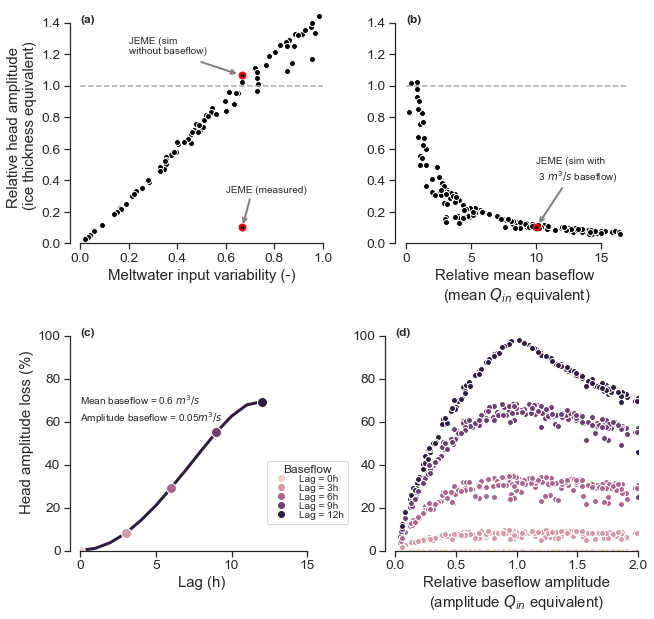

In [22]:

fig = plt.figure(figsize=(10,10))
outer = gridspec.GridSpec(2, 1, hspace = 0.3, height_ratios = [1,1]) 
#gs0 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[0], wspace=0.3)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[1], wspace=0.3)

#ax0 = plt.subplot(gs0[0,0])
ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[0,1], sharey=ax1)
ax3 = plt.subplot(gs2[0,0]) 
ax4 = plt.subplot(gs2[0,1], sharey=ax3)

#example
#time_start = 0
#time_end = time_start + 2*secinday #55
#timestep = 30*60 
#time = TimeStamps(time_start,time_end,timestep)
#head_1 = Qin_sinusoidal(time, Qin_mean_run[idx_run], Qin_amplitude_run[idx_run]) 
#ax0.plot(t_real/secinday,h_real)
#ax0.set_xlim(210,230)
#ax0.set_ylim(0,500)

#Sensitivity to meltwater input
#multiply Qin_amp_sim1 by 2
#ax1.fill_between([-0.5,1.5], 1, 1.5, facecolor = 'darkgrey', alpha = 0.5,zorder=1) 
ax1.plot((np.array(Qin_amp_sim1))*2/np.array(Qin_mean_sim1),(np.array(head_amp_sim1)/ice_thickness_sim1),#*100,/expected_head_amplitude
         linestyle='',marker='o',markeredgecolor='white', color='black')
ax1.plot([0,1],[1,1], linestyle='--', color='darkgrey')
#ax1.plot((np.array(Qin_amp_sim1_800))*2/np.array(Qin_mean_sim1_800),(np.array(head_amp_sim1_800)/800),#*100,/expected_head_amplitude
#         linestyle='',marker='o',markeredgecolor='white', color='green')
ax1.plot(0.2/0.3,original_head_amplitude/500,marker='o',markeredgewidth=2,markeredgecolor='red', color='black')
ax1.plot(0.2/0.3,expected_head_amplitude/500,marker='o',markeredgewidth=2,markeredgecolor='red', color='black')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1.5])
ax1.set_ylabel('Relative head amplitude \n(ice thickness equivalent)')
ax1.set_xlabel('Meltwater input variability (-)')#('bf_amplitude/bf_mean')
sns.despine(offset=[10,0],trim=True, ax=ax1)

#Sensitivity to meltwater input
#ax2.axhspan(1, 2, facecolor = 'darkgrey', alpha = 0.5,zorder=1) 
for idx in np.arange(len(bf_mean_sim2)):
    if (abs(head_amp_test_sim2[idx] - head_amp_sim2[idx]) / head_amp_sim2[idx]) * 100 <2:
        ax2.plot(bf_mean_sim2[idx]/Qin_mean_sim2,
                (head_amp_sim2[idx])/500,#*100, 
                 linestyle='',marker='o',markeredgecolor='white', color='black')
ax2.plot(3/0.3,expected_head_amplitude/500,marker='o', markeredgewidth=2,markeredgecolor='red', color='black')
ax2.plot([0,17],[1,1], linestyle='--', color='darkgrey')
#ax2.set_ylabel('% measured head amplitude (m)')
ax2.set_xlabel('Relative mean baseflow \n(mean $Q_{in}$ equivalent)')#Mean baseflow (Mean $Q_{in}$ equivalent)')#('bf_amplitude/bf_mean')
#ax2.set_ylim([0,300])
#ax.legend()
sns.despine(offset=[0,0],trim=True, ax=ax2)



palette_lag = sns.cubehelix_palette(n_colors=len(lags))

#Lag -- per baseflow
ax3.plot(lags,100-(head_amp_lag_sim3/head_amp_lag_sim3[0])*100,
         linestyle='-', linewidth=3,
         label='mean = %s $m^3/s$'%bf_mean_sim3, 
         color=palette_lag[-1])          
ax3.set_ylim([0,110])
ax3.set_xlim([0,16])
sns.despine(offset=[10,0],trim=True, ax=ax3)
ax3.set_ylabel('Head amplitude loss (%)')
ax3.set_xlabel('Lag (h)')
ax3.legend(loc=3, prop={'size': 10})

#plots dots
for idx in np.arange(0,len(lags),3):
    ax3.plot(lags[idx],100-(head_amp_lag_sim3[idx]/head_amp_lag_sim3[0])*100,
             linestyle='',marker='o',markeredgecolor='white', markersize=10, color=palette_lag[idx])


#Lag -- timeseries for one baselfow mean
color = sns.cubehelix_palette(n_colors=len(lags_sim4))
for idx in np.arange(len(head_amp_lag_sim4)):
        percent_head_lag = 100-(head_amp_lag_sim4[idx]/head_amp_lag_sim4[idx][0]) *100
        ratio_amplitude= (np.array(bf_amplitude_sim4[idx] )/Qin_amplitude_sim4)
        for jdx in np.arange(len(lags_sim4)):
            if (abs(head_amp_lag_test_sim4[idx][jdx] - head_amp_lag_sim4[idx][jdx]) 
                / head_amp_lag_sim4[idx][jdx]) * 100 <5:
                ax4.plot(ratio_amplitude,percent_head_lag[jdx], marker='o', 
                         markeredgecolor='white', color=color[jdx])#, label='lag=0h')

ax4.set_xlabel('Relative baseflow amplitude\n(amplitude $Q_{in}$ equivalent)')#Amplitude baseflow (Qin amplitude equivalent) (-)')
ax4.set_xlim([0,2])
sns.despine(offset=[10,0],trim=True, ax=ax4)


elements = [Line2D([0], [0],  marker='o', color=color[0], lw=0, label='Lag = 0h'),
            Line2D([0], [0],  marker='o', color=color[1], lw=0, label='Lag = 3h'),
            Line2D([0], [0],  marker='o', color=color[2], lw=0, label='Lag = 6h'),
            Line2D([0], [0],  marker='o', color=color[3], lw=0, label='Lag = 9h'),
            Line2D([0], [0],  marker='o', color=color[4], lw=0, label='Lag = 12h')]

#ax4bis.legend(prop={'size': 10}, loc='center left', bbox_to_anchor=(0, 0.35))
ax3.legend(handles=elements, loc=2, bbox_to_anchor=(0.75, 0.4), labelspacing=0,  
           prop={'size': 10}, title='Baseflow',title_fontsize=12)

ax1.add_artist(ConnectionPatch((0.5,1.15),(0.2/0.3,original_head_amplitude/500),'data','data', shrinkB=5,
                arrowstyle="->", color='grey', linewidth=2))
ax1.text(0.2,1.2,'JEME (sim \nwithout baseflow)',fontsize=10)

ax1.add_artist(ConnectionPatch((0.7,0.28),(0.2/0.3,0.09),'data','data', shrinkB=5,
                arrowstyle="->", color='grey', linewidth=2))
ax1.text(0.6,0.32,'JEME (measured)',fontsize=10)

ax2.add_artist(ConnectionPatch((12,0.35),(3/0.3,expected_head_amplitude/500),'data','data', shrinkB=5,
                arrowstyle="->", color='grey', linewidth=2))
ax2.text(10,0.4,'JEME (sim with \n 3 $m^3/s$ baseflow)',fontsize=10)

#ax3.add_artist(ConnectionPatch((6,45),(7,55),'data','data', shrinkB=5,
#                arrowstyle="->", color='black', linewidth=2))
ax3.text(0,60,'Mean baseflow = 0.6 $m^3/s$\nAmplitude baseflow = 0.05$m^3/s$',fontsize=10)

#letters
ax1.text(0,1.4,'(a)',fontsize=12, weight='bold', bbox=dict(facecolor='white'))
ax2.text(0,1.4,'(b)',fontsize=12, weight='bold', bbox=dict(facecolor='white'))
ax3.text(0,100,'(c)',fontsize=12, weight='bold', bbox=dict(facecolor='white'))
ax4.text(0,100,'(d)',fontsize=12, weight='bold', bbox=dict(facecolor='white'))



plt.savefig('Figure_TC/fig06.pdf',bbox_inches='tight')